# 数据读取

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option( 'display.precision',2)
%matplotlib inline

In [15]:
data = pd.read_csv("../data/energy.csv")
data.columns = ["time", "load", "temp"]

In [3]:
load = data['load'].values

<Axes: ylabel='Density'>

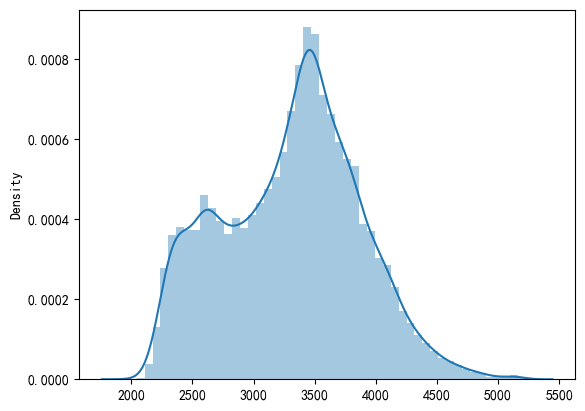

In [4]:
sns.distplot(load)

# 采样方法

In [5]:
# KL散度计算
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def kl_plot(data1, data2):
    # 设定随机数种子
    np.random.seed(42)

    # 生成两个直方图
    hist1, bins1 = np.histogram(data1, bins=50, density=True) # hist等于频率/组距
    hist2, bins2 = np.histogram(data2, bins=50, density=True)

    # 计算每个区间的概率密度
    pdf1 = hist1 / np.sum(hist1)
    pdf2 = hist2 / np.sum(hist2)

    # 计算KL散度
    kl_divergence = entropy(pdf1, pdf2)

    # 打印结果
    print("KL散度:", kl_divergence)

    # 绘制直方图和概率密度函数
    plt.figure()
    plt.hist(data1, bins=bins1, density=True, alpha=0.3, color='#11b3b6', label='Data 1', histtype='stepfilled' )
    plt.hist(data2, bins=bins2, density=True, alpha=0.3, color='#f14643', label='Data 2', histtype='stepfilled')
    plt.legend() 
    plt.title('频率直方图')

    plt.figure()
    plt.plot((bins1[:-1] + bins1[1:]) / 2, pdf1, color='#11b3b6', linestyle='dashed', linewidth=2, label='PDF 1')
    plt.plot((bins2[:-1] + bins2[1:]) / 2, pdf2, color='#f14643', linestyle='dashed', linewidth=2, label='PDF 2')
    # 显示图例和标题
    plt.legend()
    plt.title('概率密度图')

    plt.show()
    
    return kl_divergence

In [6]:
from scipy.stats import ks_2samp
import numpy as np

def ks_test(data1, data2):
    # 进行KS检验
    statistic, p_value = ks_2samp(data1, data2)

    # 打印结果
    print("KS统计量:", statistic)
    print("P值:", p_value)

    # 判断是否拒绝原假设
    alpha = 0.05
    if p_value < alpha:
        print("拒绝原假设，两个样本来自不同分布")
    else:
        print("无法拒绝原假设，两个样本可能来自相同分布")
    return p_value

## 重采样

resample 函数通常与时间序列数据结合使用，特别是在处理 pandas DataFrame 或 Series 对象时。这个函数主要用于对时间序列数据进行重新采样，可以将时间序列数据从一个频率转换为另一个频率。

resample 函数是 pandas 库中用于重新采样时间序列数据的方法。它有一些参数，允许你指定重新采样的方式。以下是一些常见的参数：

- rule：指定重新采样的频率字符串或 DateOffset 对象。例如，'D' 表示每天，'2D' 表示每两天，'M' 表示每月。还可以使用 DateOffset 对象，例如 pd.DateOffset(days=5) 表示每5天。

- how：指定聚合函数，用于在新的时间间隔内合并数据。常见的聚合函数包括 'mean'（均值）、'sum'（总和）、'max'（最大值）等。默认为 'mean'。

- closed：指定重新采样的哪一边是闭合的。可以是 'right'、'left' 或 None。默认为 'right'。

- label：用于指定在重新采样过程中，放置结果的 bin 的标签的哪一边。可以是 'right'、'left' 或 None。默认为 'right'。

- convention：用于指定在重采样中如何处理边界。可选值包括 'start'、'end'、's'、'e'。默认为 'end'。

- kind：指定返回的对象类型，可以是 'timestamp' 或 'period'。默认为 None。

- loffset：对结果的索引进行平移的固定偏移量。可以是字符串、timedelta 对象或 DateOffset 对象。

- base：用于调整日期偏移量的基本日期。默认为 0。

rule 参数用于指定重新采样的频率，它可以是一些字符串表示或者是 DateOffset 对象。以下是一些常见的字符串表示：

- 字符串表示：

'B'：每工作日（不包括周末）。  
'D'：每日。  
'W'：每周。  
'M'：每月的月底。  
'MS'：每月的第一天。  
'Q'：每季度的月底。  
'QS'：每季度的第一天。  
'A'：每年的年底。  
'AS'：每年的第一天。  
'T'：每分钟。  
'H'：每小时。  
'S'：每秒。  
'L'：每毫秒。  
等等。
- 自定义频率字符串：

'2D'：每两天。  
'3W'：每三周。  
'5M'：每五个月。  
- DateOffset 对象：pd.DateOffset 对象表示相对于基准日期的时间偏移。例如：

pd.DateOffset(days=5)：每5天。  
pd.DateOffset(weeks=2)：每两周。  
pd.DateOffset(months=3)：每三个月。  

In [16]:
data['time'] = pd.to_datetime(data['time'])
data.set_index("time", inplace=True)

In [24]:
# 将时间序列数据按每天进行重新采样，使用均值作为聚合函数
daily_resampled = data.resample('D').mean()

# 将时间序列数据按每两天进行重新采样，使用总和作为聚合函数
two_days_resampled = data.resample('2D').sum()

# 将时间序列数据按每月进行重新采样，使用最大值作为聚合函数
monthly_resampled = data.resample('M').max()

In [22]:
daily_resampled.head()

,load,temp
time,,
2012-01-01,"2,981.75",37.76
2012-01-02,"3,201.71",37.40
2012-01-03,"3,661.96",17.43
2012-01-04,"3,840.33",13.11
2012-01-05,"3,670.67",24.88


In [25]:
monthly_resampled.head()

,load,temp
time,,
2012-01-31,"4,507.00",46.33
2012-02-29,"4,193.00",50.33
2012-03-31,"4,115.00",80.67
2012-04-30,"3,564.00",80.33
2012-05-31,"3,751.00",83.33


In [29]:
hour_resampled = data.resample("H").mean()
hour_resampled.head()

,load,temp
time,,
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00


## 均匀采样

均匀采样是下采样的最常见方法之一。它可以均匀地从原始信号中选择一些样本，使采样率减小，从而减少采样后的数据量。在信号处理领域，均匀采样通常被视为理想的采样方式。

KL散度: inf


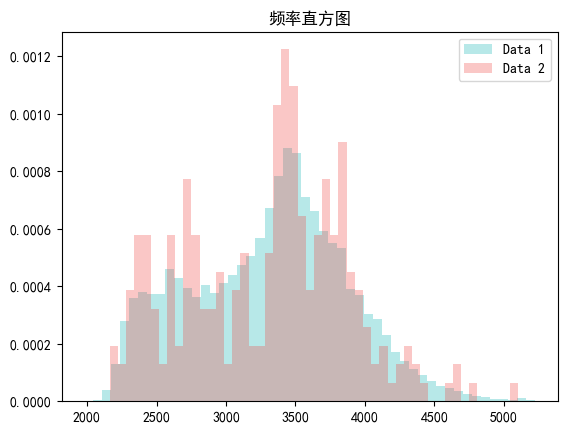

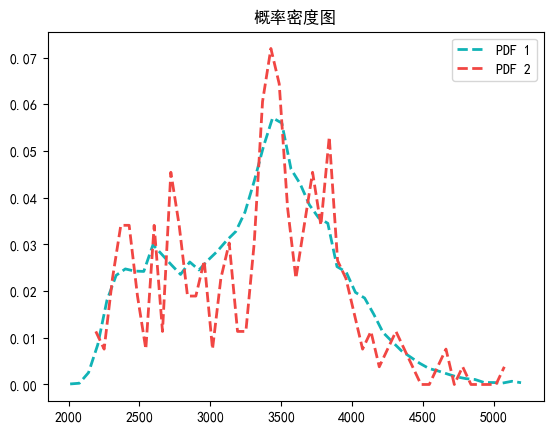

inf

In [7]:
# 均匀采样，每隔100个样本进行一次采样
x_downsampled = load[::100]
kl_plot(load, x_downsampled)

In [8]:
ks_test(load, x_downsampled)

KS统计量: 0.04824015704490159
P值: 0.5614598642065927
无法拒绝原假设，两个样本可能来自相同分布


0.5614598642065927

## 非均匀采样

KL散度: inf


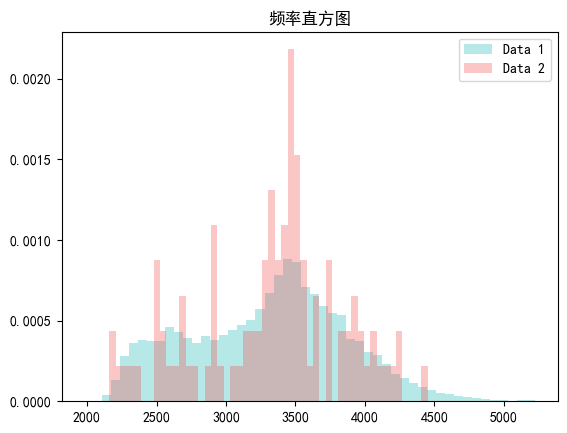

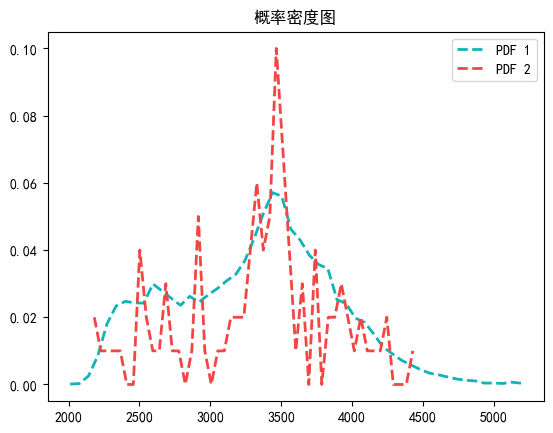

inf

In [9]:
# 随机采样，选择100个样本进行采样
nums = len(load)
idx = np.random.choice(range(nums), 100)
x_downsampled = load[idx]
kl_plot(load, x_downsampled)

In [10]:
ks_test(load, x_downsampled)

KS统计量: 0.09715632603406327
P值: 0.28305605307067905
无法拒绝原假设，两个样本可能来自相同分布


0.28305605307067905

## 分层随机采样

"分层随机采样" 通常是指在对数据集进行采样时，按照不同的层级进行采样，以确保每个层级都有足够的样本被选中。

In [14]:
import pandas as pd
import numpy as np

# 创建一个示例数据框
data = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Layer': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'D', 'D'],
        'Value': [10, 20, 15, 25, 18, 30, 22, 35, 40, 50]}

df = pd.DataFrame(data)

# 按层级进行随机采样
def stratified_sample(df, col, size):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(frac=size))

# 设置每个层级的采样比例
sampled_df = stratified_sample(df, 'Layer', size=0.5)

print(sampled_df)

   ID Layer  Value
1   2     A     20
2   3     B     15
4   5     C     18
6   7     D     22
8   9     D     40


## OCSVM采样

空间采样（OCSVM）算法是一种经典的异常检测算法，基本原理与 SVM 类似，与 SVM 关注的二分类问题不同的是，OCSVM 只有一个分类，这也正是异常检测所需要的，不关注异常的数据点。OCSVM 的基本思想是: 将数据映射到高维空间中，使得正常样本在该空间中有较高的密度，而异常样本则较为孤立。具体而言，OCSVM通过找到一个超平面来划分正常样本和异常样本，而这个超平面应尽可能地与正常样本接近。OCSVM的目标是最大化支持向量到超平面的边距，即最大化正常样本的密度。通过这种方式，OCSVM可以有效地识别出异常样本，因为异常样本往往远离正常样本区域。

可以选择一个适当的阈值来判断样本是否为异常。通常情况下，距离超过阈值的样本被认为是异常。

In [47]:
from sklearn.svm import OneClassSVM
import pandas as pd

# 假设 df 是包含正常类别和异常类别的数据框
# 正常类别用 label=1 表示，异常类别用 label=-1 表示

# 准备数据集
data = {'feature1': [1, 2, 3, 4, 5, 20, 25, 30],
        'feature2': [2, 3, 4, 5, 6, 15, 18, 22],
        'label': [1, 1, 1, 1, 1, -1, -1, -1]}

df = pd.DataFrame(data)

# 提取特征
normal_samples = df[df['label'] == 1].drop('label', axis=1) # 正常样本
features = df.drop('label', axis=1) # 所有样本

# 训练 OCSVM 模型
ocsvm_model = OneClassSVM()
ocsvm_model.fit(normal_samples)

# 获取分数，这个分数通常用来衡量样本与正常模式之间的偏离程度，越高的异常分数表示样本越可能是异常。正负代表距离
scores = ocsvm_model.decision_function(features)

# # 设定异常阈值
# th = 1
# 自动设定异常阈值为异常分数的上分位数，95%分位数
auto_threshold = pd.Series(abs(scores)).quantile(0.95)

# 新增预测列
features['predict_labels'] = [-1 if abs(scores[i]) >= auto_threshold else 1 for i in range(len(scores))]

# 按层级进行随机采样
def stratified_sample(df, col, size):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(frac=size))

# 设置每个层级的采样比例
sampled_df = stratified_sample(features, 'predict_labels', size=0.8)

print(sampled_df)

   feature1  feature2  predict_labels
5        20        15              -1
7        30        22              -1
2         3         4               1
0         1         2               1
4         5         6               1
3         4         5               1


## 广义加权采样

广义加权采样通常是指在采样过程中考虑到样本的权重，以更灵活地选择样本。这种采样方法在各种领域和应用中都有可能被使用，例如机器学习、统计学、数据分析等。

在广义加权采样中，每个样本都被赋予一个权重，该权重反映了该样本在整体分布中的重要性或贡献程度。采样过程中，样本被选中的概率与其权重成正比。这样可以确保对于重要性较高的样本，被选中的概率更大。

具体的广义加权采样算法可以根据具体应用的需求而有所不同。在机器学习中，例如在训练不平衡数据集时，可以使用广义加权采样来平衡不同类别的样本，使模型更好地学习到各个类别的特征。

In [48]:
import numpy as np

# 假设有一个数据集和每个样本的权重
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
weights = np.array([0.1, 0.2, 0.5, 0.2]) # 

# 使用权重进行加权随机采样
num_samples_to_select = 2
selected_indices = np.random.choice(len(data), num_samples_to_select, p=weights / np.sum(weights), replace=False)

# 从数据集中选择加权随机采样的样本
selected_samples = data[selected_indices]

print("Selected Samples:")
print(selected_samples)

Selected Samples:
[[7 8]
 [5 6]]


## 蓄水池算法

蓄水池抽样（Reservoir Sampling）是一种随机抽样算法，通常用于从数据流中等概率地抽取 k 个样本。这个算法的主要应用场景是在遍历一个数据流时，需要从中随机选择一部分样本而不知道数据流的总长度。

蓄水池抽样的基本思想是：对于前 k 个元素，以 1 到 k 的等概率选择一个作为蓄水池中的样本，然后对于第 i 个元素（i > k），以 k/i 的概率选择它替换蓄水池中的一个样本。

In [53]:
import random

def reservoir_sampling(data_stream, k):
    reservoir = [data_stream[i] for i in range(k)]  # 初始化蓄水池

    for i in range(k, len(data_stream)):
        j = random.randint(0, i)  # 生成一个 [0, i] 之间的随机数
        if j < k:
            reservoir[j] = data_stream[i]

    return reservoir

# 示例使用
data_stream = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 3
result = reservoir_sampling(data_stream, k)
print("Reservoir Samples:", result)

Reservoir Samples: [5, 8, 3]


## GSW采样

## LTTB采样

这是一种数据降采样方法，用于在大量数据中提取足够的样本，以便在可视化或展示中有效地表示数据趋势而不失去重要信息。

该方法的基本思想是将原始数据分割成若干个桶（buckets），然后在每个桶内选择一个最大的三角形来代表该桶的数据。这样就可以通过选择少量的数据点来近似表示整个数据集。

In [67]:
import numpy as np

def lttb(data, threshold):
    data = np.array(data)
    if len(data) < 3:
        return data

    num_buckets = len(data) // 3
    sampled_data = np.zeros((num_buckets, 2))

    for i in range(num_buckets):
        bucket_start = i * 3
        bucket_end = min((i + 1) * 3, len(data))
        bucket = data[bucket_start:bucket_end]

        max_triangle = find_largest_triangle(bucket, threshold)
        sampled_data[i] = max_triangle

    return sampled_data

def find_largest_triangle(bucket, threshold):
    if len(bucket) != 3:
        return bucket

    x = np.array([0, 1, 2])
    y = np.array(bucket)

    area = 0.5 * np.abs(np.cross([x[0], y[0], 1], [x[1], y[1], 1]) +
                        np.cross([x[1], y[1], 1], [x[2], y[2], 1]) +
                        np.cross([x[2], y[2], 1], [x[0], y[0], 1]))

    # 选择最大三角形时考虑阈值
    if max(area) >= threshold:
        max_index = np.argmax(area)
        return np.array([x[max_index], y[max_index]])
    else:
        # 如果最大三角形的面积小于阈值，则返回当前桶的中点
        mid_point = np.array([(x[0] + x[1] + x[2]) / 3, (y[0] + y[1] + y[2]) / 3])
        return mid_point

# 示例数据
original_data = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55, 89])

# 设置阈值为4
threshold = 4

# 进行 LTTB 采样
sampled_data = lttb(original_data, threshold)

print("原始数据:", original_data)
print("降采样后的数据（numpy形式）:", sampled_data)

原始数据: [ 1  2  3  5  8 13 21 34 55 89]
降采样后的数据（numpy形式）: [[ 1.          2.        ]
 [ 1.          8.66666667]
 [ 2.         55.        ]]


## 频率直方图采样

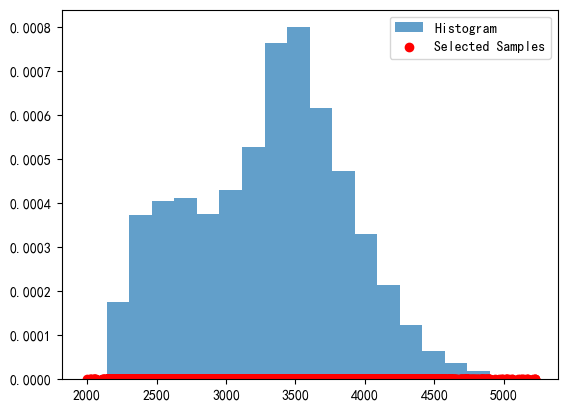

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def frequency_histogram_sampling(samples, bins=None, size=1):
    # 获取频率直方图
    hist, bin_edges = np.histogram(samples, bins=bins, density=True)

    # 归一化直方图的概率值
    hist = hist / np.sum(hist)

    # 使用numpy的random.choice进行加权采样
    selected_bins = np.random.choice(len(bin_edges) - 1, size=size, p=hist)

    # 从选中的bin中随机选择样本
    selected_samples = [np.random.uniform(bin_edges[i], bin_edges[i + 1]) for i in selected_bins]

    return selected_samples

# 示例用法
np.random.seed(42)
# 生成一组样本，这里使用正态分布作为例子
samples = load

# 设置bin的数量，可以根据实际情况调整
bins = 20

# 采样个数
size = 13000

selected_samples = frequency_histogram_sampling(samples, bins=bins, size=size)

# 绘制直方图和采样点
plt.hist(samples, bins=bins, density=True, alpha=0.7, label='Histogram')
plt.scatter(selected_samples, [0] * len(selected_samples), color='red', label='Selected Samples')
plt.legend()
plt.show()

KL散度: 0.00920946289810598


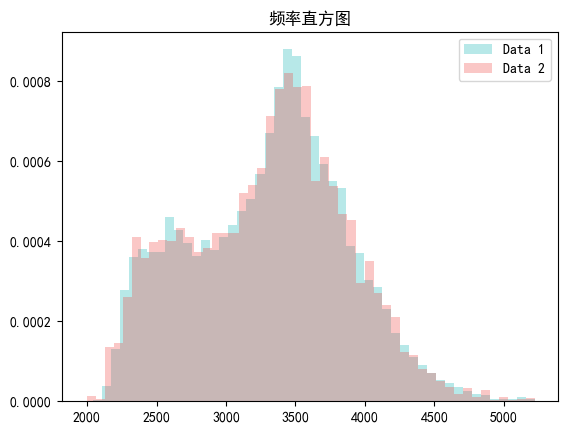

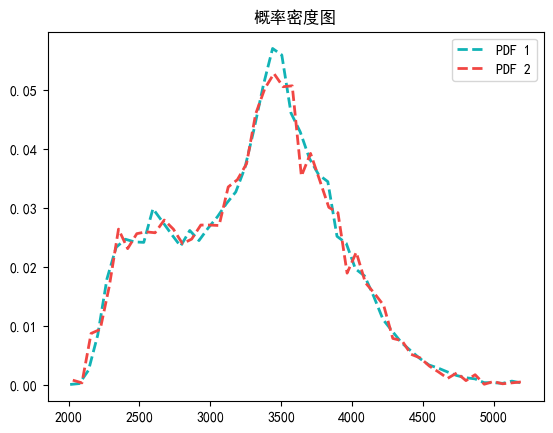

0.00920946289810598

In [82]:
kl_plot(load, selected_samples)